In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from tutorial.chapter5.demo.code.apriori import *
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA

In [59]:
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['font.family']=['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
fn='tutorial/chapter5/demo/data/bankloan.xls'
data=pd.read_excel(fn)

In [4]:
data.head()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [5]:
x=data.iloc[:,:8].values
y=data.iloc[:,8].values

In [6]:
lr=LR(max_iter=200)
lr.fit(x,y)

LogisticRegression(max_iter=200)

In [7]:
print('accuracy: %s' %(lr.score(x,y)))

accuracy: 0.8085714285714286


In [8]:
fn='tutorial/chapter5/demo/data/sales_data.xls'
data = pd.read_excel(fn,index_col='序号')

In [9]:
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高


In [10]:
data[data=='好']=1
data[data=='是']=1
data[data=='高']=1
data[data!=1]=-1

In [11]:
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,-1,1,1,1
2,-1,1,1,1
3,-1,1,1,1
4,-1,-1,1,1
5,-1,1,1,1


In [12]:
x=data.iloc[:,:3].values
y=data.iloc[:,3].values

In [13]:
x=x.astype(int)
y=y.astype(int)

In [14]:
dtc=DTC(criterion='entropy')

In [15]:
dtc.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [16]:
print('accuracy : %s' % dtc.score(x,y))

accuracy : 0.7647058823529411


In [17]:
fn='tutorial/chapter5/demo/data/consumption_data.xls'
data=pd.read_excel(fn,index_col='Id')

In [18]:
data.head()

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05


In [19]:
data_zs=(data-data.mean())/data.std()

In [20]:
k=3
iteration=500

In [21]:
model=KMeans(n_clusters=k,max_iter=iteration,random_state=1234)

In [22]:
model.fit(data_zs)

KMeans(max_iter=500, n_clusters=3, random_state=1234)

In [23]:
r1 = pd.Series(model.labels_).value_counts()

In [24]:
r2 = pd.DataFrame(model.cluster_centers_)

In [25]:
r2

,0,1,2
0,-0.160451,1.114802,0.392844
1,3.455055,-0.295654,0.449123
2,-0.149353,-0.658893,-0.271780


In [26]:
r = pd.concat((r2,r1),axis=1)

In [27]:
r.columns=list(data.columns)+['类别数目']

In [28]:
print(r)

          R         F         M  类别数目
0 -0.160451  1.114802  0.392844   341
1  3.455055 -0.295654  0.449123    40
2 -0.149353 -0.658893 -0.271780   559


In [29]:
r=pd.concat([data,pd.Series(model.labels_,index=data.index)],axis=1)

In [30]:
r.columns=list(data.columns)+['聚类类别']

In [31]:
r.head()

,R,F,M,聚类类别
Id,,,,
1,27,6,232.61,2
2,3,5,1507.11,2
3,4,16,817.62,0
4,3,11,232.81,2
5,14,7,1913.05,2


In [32]:
def density_plot(data):
    p = data.plot(kind='kde',linewidth=2,subplots=True,sharex = False)
    [p[i].set_ylabel('density') for i in range(k)]
    plt.legend()

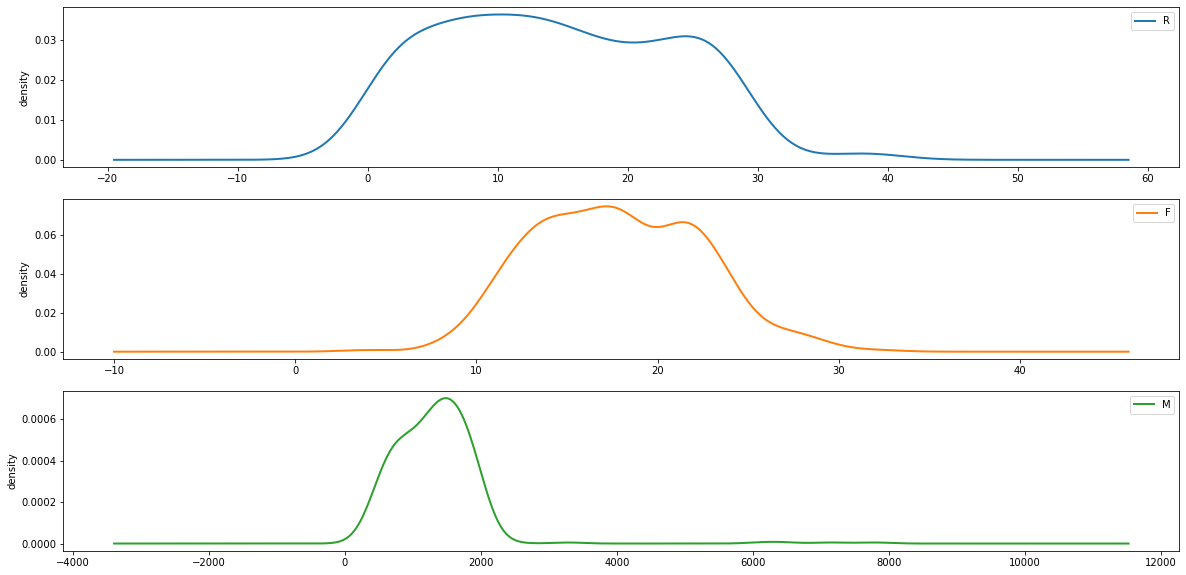

In [33]:
density_plot(data[r['聚类类别']==0])
plt.show()

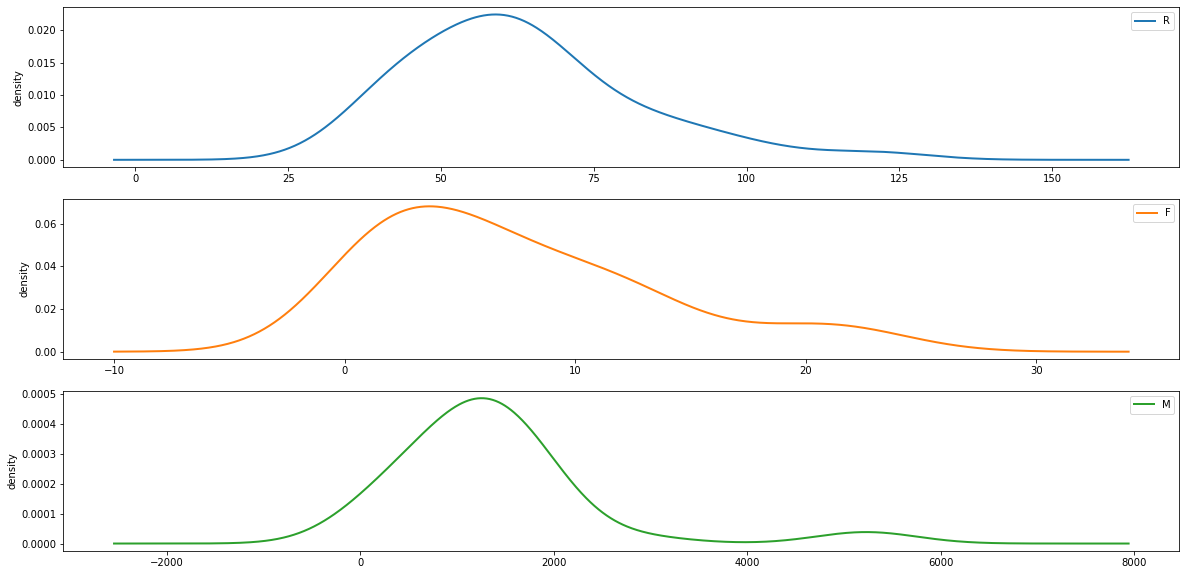

In [34]:
density_plot(data[r['聚类类别']==1])
plt.show()

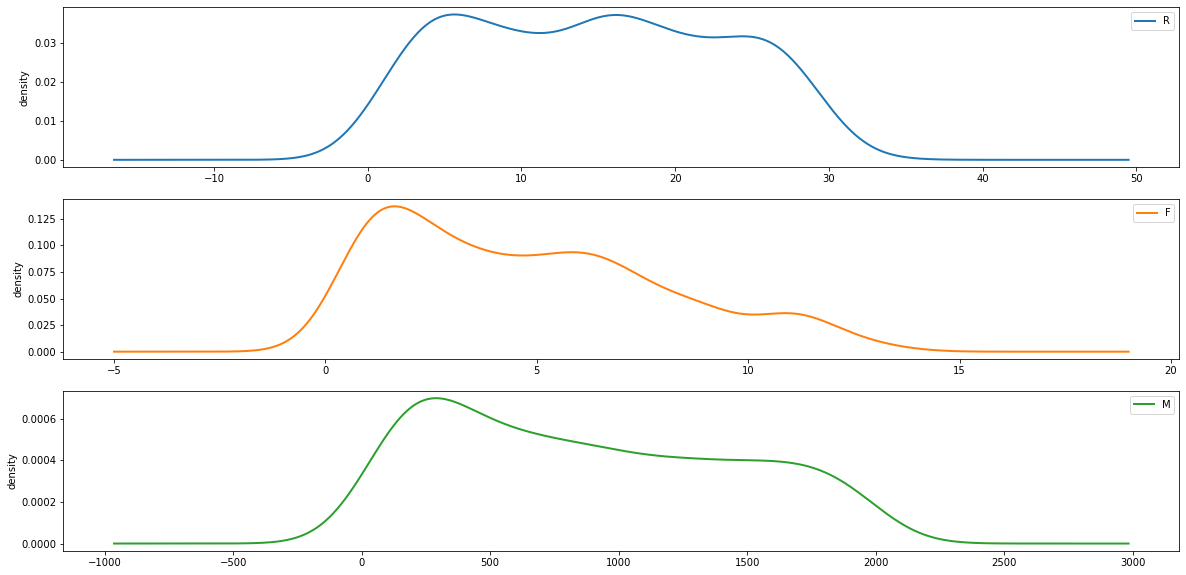

In [35]:
density_plot(data[r['聚类类别']==2])
plt.show()

In [36]:
tsne = TSNE(random_state=105)

In [37]:
tsne.fit_transform(data_zs)

array([[ 10.69704   ,  24.370981  ],
       [-28.988472  ,   0.54076564],
       [ 28.237013  ,  -9.404069  ],
       ...,
       [ -0.7135533 ,  -0.4558866 ],
       [ -2.9452434 ,   8.225773  ],
       [ -5.973362  ,  14.843742  ]], dtype=float32)

In [38]:
tsne = pd.DataFrame(tsne.embedding_,index=data_zs.index)

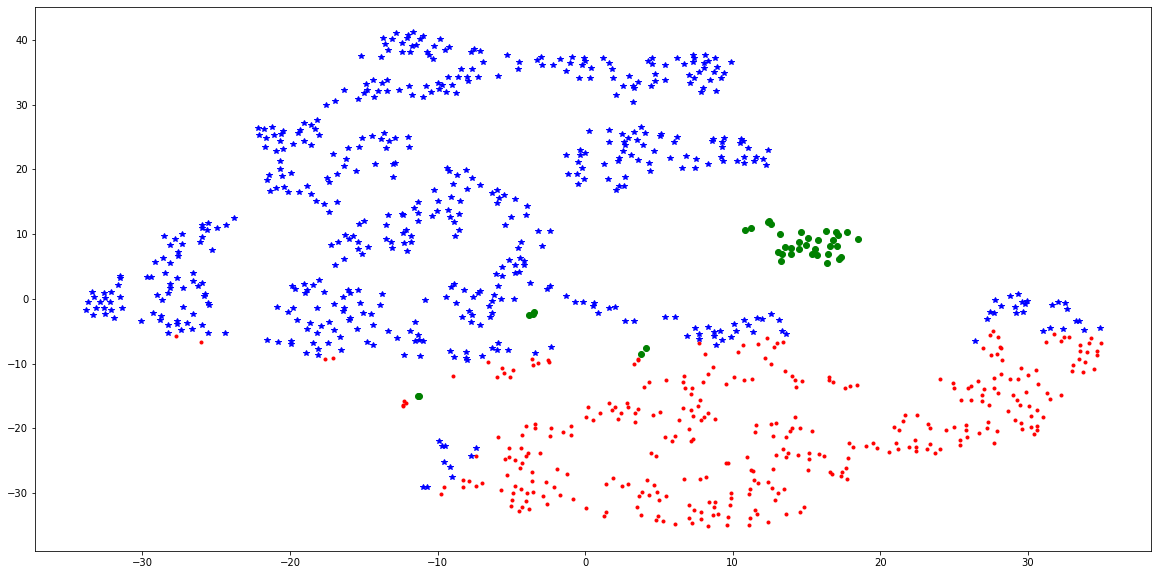

In [39]:
d=tsne[r['聚类类别']==0]
plt.plot(d[0],d[1],'r.')
d=tsne[r['聚类类别']==1]
plt.plot(d[0],d[1],'go')
d=tsne[r['聚类类别']==2]
plt.plot(d[0],d[1],'b*')
plt.show()

In [40]:
fn='tutorial/chapter5/demo/data/menu_orders.xls'
data=pd.read_excel(fn,header=None)

In [41]:
data.describe()

,0,1,2,3
count,10,10,5,2
unique,2,3,2,2
top,a,b,c,d
freq,7,5,3,1


In [42]:
data.head()

,0,1,2,3
0,a,c,e,NaN
1,b,d,NaN,NaN
2,b,c,NaN,NaN
3,a,b,c,d
4,a,b,NaN,NaN


In [43]:
len(data)

10

In [44]:
ct=lambda x : pd.Series(1, index=x[pd.notnull(x)])

In [45]:
b = map(ct, data.values)

In [46]:
data = pd.DataFrame(list(b)).fillna(0)

In [47]:
data.head()

,a,c,e,b,d
0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0


In [48]:
support = 0.2
confidence = 0.5
ms = '-->'

In [49]:
res = find_rule(data, support, confidence,ms)


正在进行第1次搜索...
数目：6...

正在进行第2次搜索...
数目：3...

正在进行第3次搜索...
数目：0...

结果为：
           support  confidence
e-->a          0.3    1.000000
e-->c          0.3    1.000000
c-->e-->a      0.3    1.000000
a-->e-->c      0.3    1.000000
c-->a          0.5    0.714286
a-->c          0.5    0.714286
a-->b          0.5    0.714286
c-->b          0.5    0.714286
b-->a          0.5    0.625000
b-->c          0.5    0.625000
a-->c-->e      0.3    0.600000
b-->c-->a      0.3    0.600000
a-->c-->b      0.3    0.600000
a-->b-->c      0.3    0.600000


In [51]:
fn='tutorial/chapter5/demo/data/arima_data.xls'
data=pd.read_excel(fn,index_col='日期')

In [52]:
data.head()

,销量
日期,
2015-01-01,3023
2015-01-02,3039
2015-01-03,3056
2015-01-04,3138
2015-01-05,3188


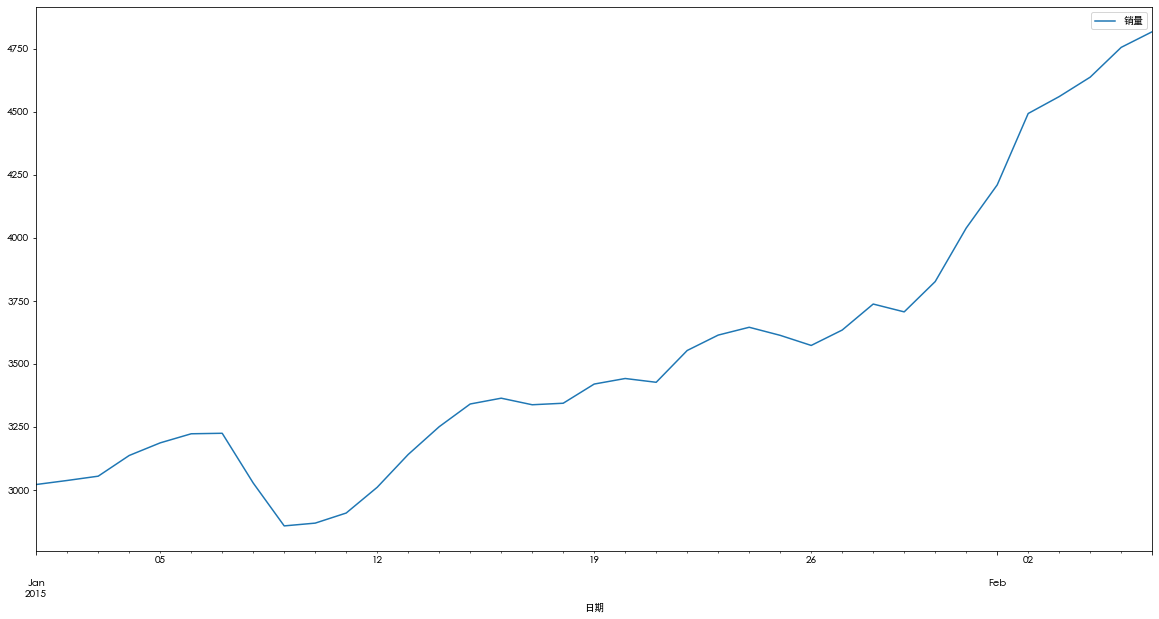

In [55]:
data.plot()
plt.show()

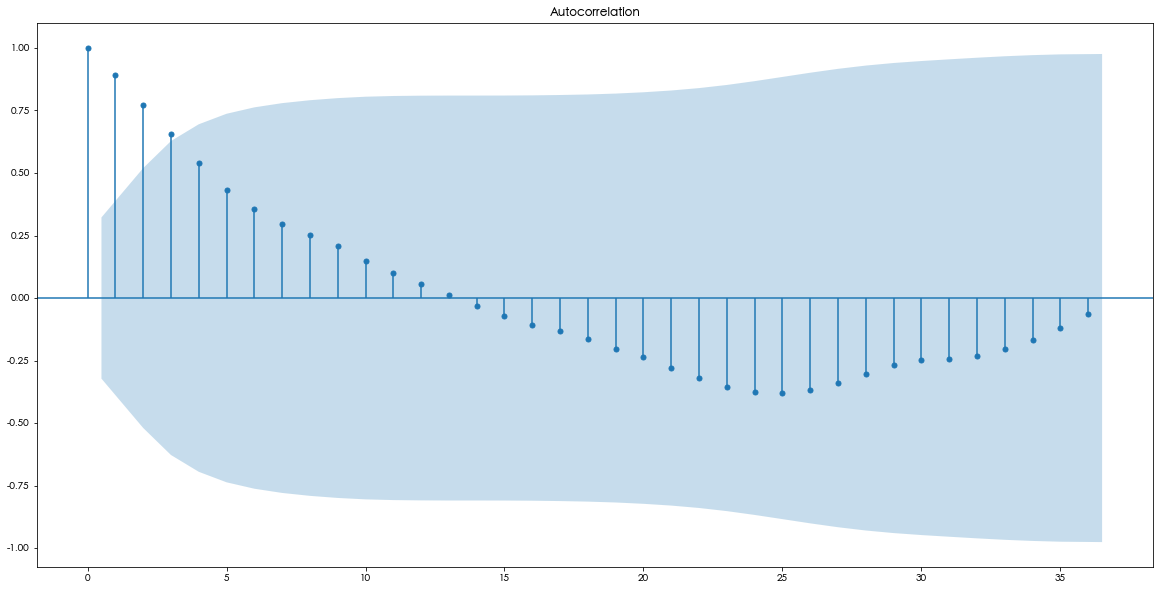

In [72]:
plot_acf(data,lags=len(data)-1)
plt.show()

In [66]:
print(ADF(data['销量']))

(1.813771015094526, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 299.46989866024177)


In [75]:
D_data = data.diff()

In [77]:
data.head()

,销量
日期,
2015-01-01,3023
2015-01-02,3039
2015-01-03,3056
2015-01-04,3138
2015-01-05,3188


In [76]:
D_data.head()

,销量
日期,
2015-01-01,NaN
2015-01-02,16.0
2015-01-03,17.0
2015-01-04,82.0
2015-01-05,50.0


In [78]:
D_data=data.diff().dropna()

In [79]:
len(D_data)

36

In [80]:
D_data.columns=['销量差分']

In [81]:
D_data.head()

,销量差分
日期,
2015-01-02,16.0
2015-01-03,17.0
2015-01-04,82.0
2015-01-05,50.0
2015-01-06,36.0


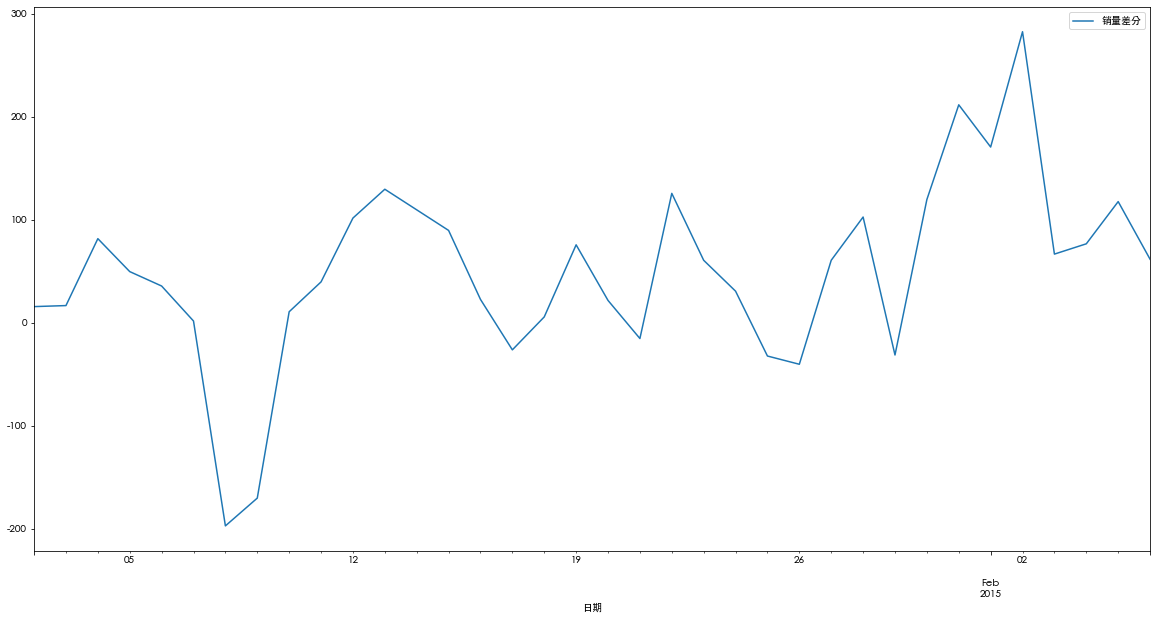

In [82]:
D_data.plot()
plt.show()

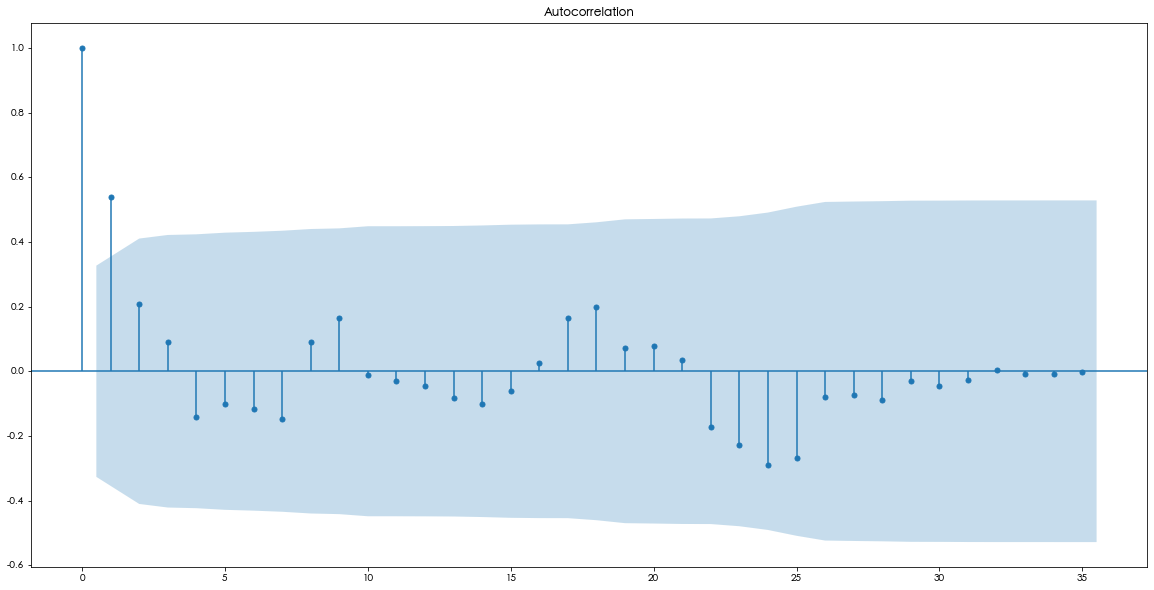

In [84]:
plot_acf(D_data,lags=len(D_data)-1)
plt.show()

In [86]:
print(ADF(D_data))

(-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.5909090780334)


In [90]:
print('diff white noise check ' , acorr_ljungbox(D_data,lags=1))

diff white noise check  (array([11.30402222]), array([0.00077339]))


In [107]:
data['销量']=data['销量'].astype(float)

In [108]:
pmax = int(len(D_data) / 10)
qmax = int(len(D_data) / 10)

In [115]:
bic_matrix = []
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data,order=(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

/Users/xiebian/anaconda3/envs/web/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/xiebian/anaconda3/envs/web/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/xiebian/anaconda3/envs/web/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [119]:
bic_matrix = pd.DataFrame(bic_matrix)

In [124]:
bic_matrix

,0,1,2,3
0,438.408893,424.350507,427.653560,426.418221
1,422.817415,426.301323,428.151390,429.746909
2,426.339071,426.660227,429.953819,433.214130
3,429.547314,429.825668,433.283967,432.608406


In [121]:
p,q = bic_matrix.stack().idxmin()

In [122]:
p,q

(1, 0)

In [125]:
model=ARIMA(data,order=(p,1,q)).fit()

/Users/xiebian/anaconda3/envs/web/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [130]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                     销量   No. Observations:                   37
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -207.825
Date:                Mon, 28 Jun 2021   AIC                            419.650
Time:                        11:53:16   BIC                            422.817
Sample:                    01-01-2015   HQIC                           420.756
                         - 02-06-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6347      0.109      5.821      0.000       0.421       0.848
sigma2      5963.5743   1327.260      4.493      0.000    3362.192    8564.957
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [137]:
data.tail()

,销量
日期,
2015-02-02,4493.0
2015-02-03,4560.0
2015-02-04,4637.0
2015-02-05,4755.0
2015-02-06,4817.0


In [132]:
model.predict?

Signature: model.predict(start=None, end=None, dynamic=False, **kwargs)
Docstring:
predict(self, start=None, end=None, dynamic=False, **kwargs)

In-sample prediction and out-of-sample forecasting

Parameters
----------
start : int, str, or datetime, optional
    Zero-indexed observation number at which to start forecasting,
    i.e., the first forecast is start. Can also be a date string to
    parse or a datetime type. Default is the the zeroth observation.
end : int, str, or datetime, optional
    Zero-indexed observation number at which to end forecasting, i.e.,
    the last forecast is end. Can also be a date string to
    parse or a datetime type. However, if the dates index does not
    have a fixed frequency, end must be an integer index if you
    want out of sample prediction. Default is the last observation in
    the sample.
dynamic : bool, int, str, or datetime, optional
    Integer offset relative to `start` at which to begin dynamic
    prediction. Can also be an absolute

In [139]:
data.tail()

,销量
日期,
2015-02-02,4493.0
2015-02-03,4560.0
2015-02-04,4637.0
2015-02-05,4755.0
2015-02-06,4817.0


In [138]:
print(model.predict(start=37,end=50))

2015-02-07    4856.351924
2015-02-08    4881.328922
2015-02-09    4897.182034
2015-02-10    4907.244139
2015-02-11    4913.630641
2015-02-12    4917.684208
2015-02-13    4920.257041
2015-02-14    4921.890040
2015-02-15    4922.926519
2015-02-16    4923.584380
2015-02-17    4924.001931
2015-02-18    4924.266953
2015-02-19    4924.435165
2015-02-20    4924.541931
Freq: D, Name: predicted_mean, dtype: float64


In [150]:
res= model.predict(start=37,end=50)

In [148]:
res = pd.c

In [155]:
res = pd.concat([data['销量'],res])

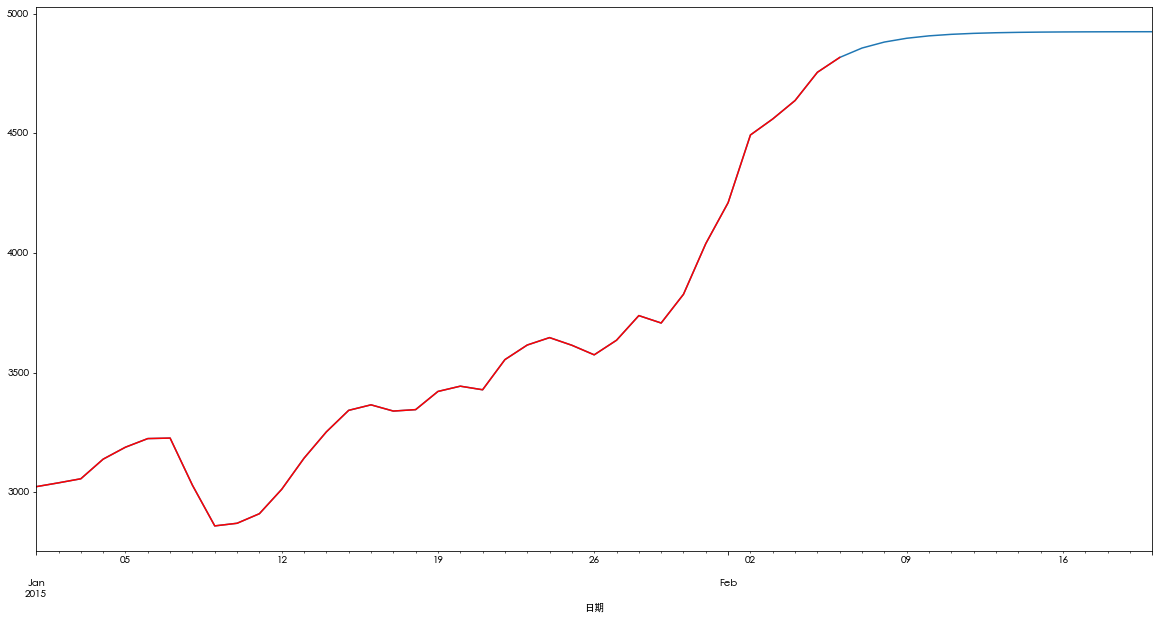

In [157]:
res.plot()
data['销量'].plot(color='r')
plt.show()

In [160]:
fn='tutorial/chapter5/demo/data/consumption_data.xls'
data=pd.read_excel(fn,index_col='Id')

In [161]:
data.head()

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05


In [162]:
k=3
iteration=500

In [163]:
data_zs = (data-data.mean())/data.std()

In [164]:
model = KMeans(n_clusters=k,max_iter=iteration)

In [165]:
model.fit(data_zs)

KMeans(max_iter=500, n_clusters=3)

In [166]:
r = pd.concat((data_zs,pd.Series(model.labels_,index=data.index)),axis=1)

In [167]:
r.columns = list(data.columns) + ['聚类类别']

In [168]:
r.head()

,R,F,M,聚类类别
Id,,,,
1,0.764186,-0.493579,-1.158711,0
2,-1.024757,-0.630079,0.622527,0
3,-0.950217,0.871423,-0.341103,1
4,-1.024757,0.188922,-1.158432,0
5,-0.204824,-0.357079,1.189868,0


In [171]:
r['聚类类别'].unique()

array([0, 1, 2], dtype=int32)

In [174]:
norm = []
for i in range(k):
    norm_tmp = r[['R','F','M']][r["聚类类别"]==i] - model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm,axis=1)
    norm.append(norm_tmp / norm_tmp.median())
norm = pd.concat(norm)

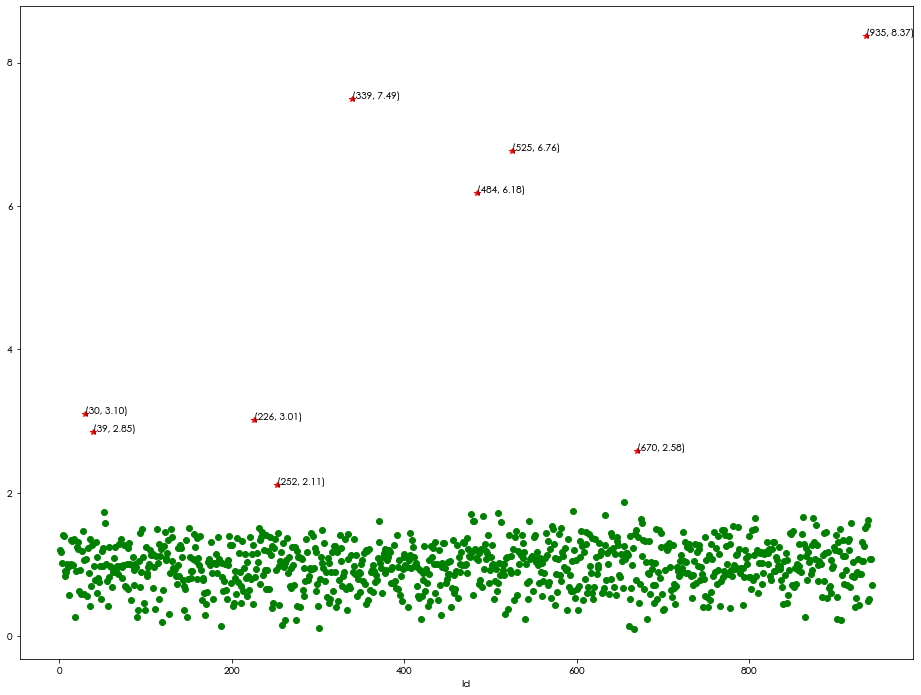

In [182]:
plt.figure(figsize=(16,12))
threshold=2
norm[norm <= threshold].plot(style='go')
dis_points = norm[norm > threshold]
dis_points.plot(style='r*')
for i in range(len(dis_points)):
    idx = dis_points.index[i]
    n = dis_points.iloc[i]
    plt.annotate('(%s, %.2f)'%(idx,n),xy=(idx,n),xytext=(idx,n))
plt.show()

In [184]:
type(dis_points)

pandas.core.series.Series